## FRB 180916.J0158 + 65: Ajuste y suavisado

### Parte 1

In [10]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#### Cargar y graficar la serie

In [4]:
data_crudos = pd.read_csv("/home/wattie/frb/conteo.csv", index_col='mjd')
data = data_crudos.dropna()
ts = data["flux"]

Text(0.5, 0, 'MJD')

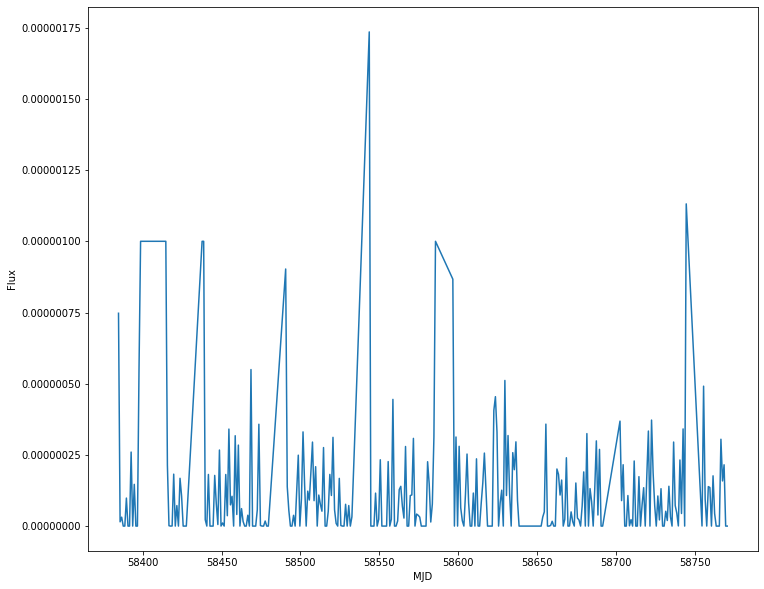

In [11]:
plt.plot(ts)
plt.ylabel("Flux")
plt.xlabel("MJD")
#plt.xlim(1960,2015)
#plt.savefig("CO2_Mauna_Loa.png")

#### Ajuste de curva

In [12]:
#def recta (x, a, b):
#    return a*x + b
def seno(x, a, b):
    return a * np.sin(b * x)

In [13]:
tiempo = np.asarray(ts.index)   # conversión automática a fecha decimal
c02 = np.asarray(ts.data)

/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  


In [14]:
popt, pcov = curve_fit(seno, tiempo, c02)
a,b = popt
print("Ajuste: %.5f * x + %.3f" % (a,b))

Ajuste: 0.00000 * x + 1.000


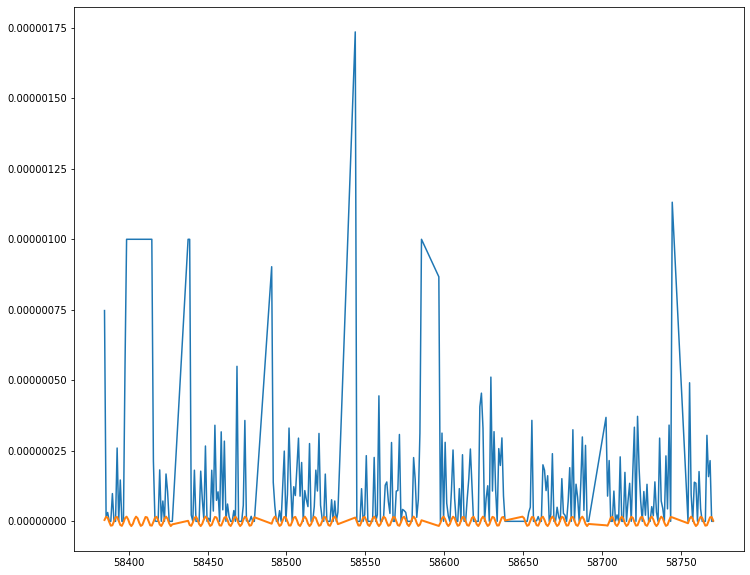

In [16]:
tendencia = seno(tiempo,a,b)   # evaluación automática sobre todos los elementos de fechas
plt.plot(tiempo,c02)
plt.plot(tiempo,tendencia,lw=2)

In [ ]:
#def parabola (x, a, b, c):
#    return a*x**2 + b*x + c

In [ ]:
#popt, pcov = curve_fit(parabola, tiempo, c02)
#a,b,c = popt
#print("Ajuste: %.5f * x^2 + %.5f * x + %.2f" % (a,b,c))

In [ ]:
#tendencia = parabola(tiempo,a,b,c)
#plt.plot(tiempo,c02)
#plt.plot(tiempo,tendencia,lw=2)

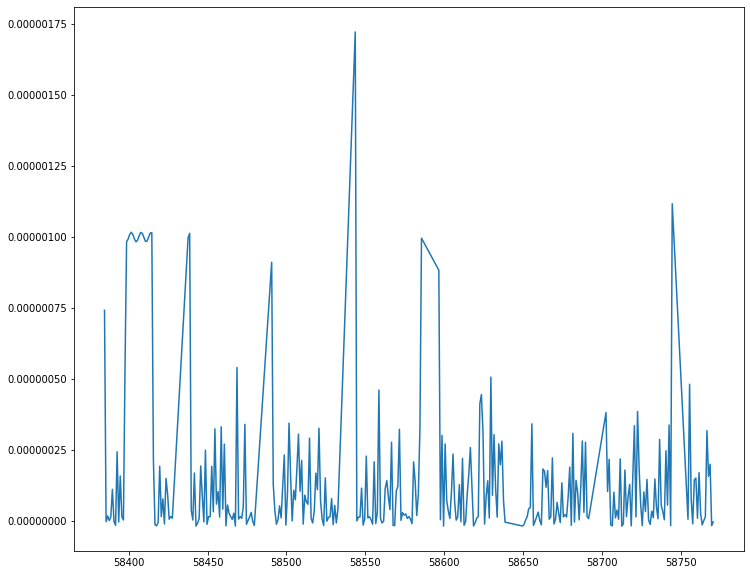

In [17]:
plt.plot(ts - tendencia)

### Parte 2

#### Media Móvil Simple

In [18]:
ts_SMA = ts.rolling(window=12).mean()

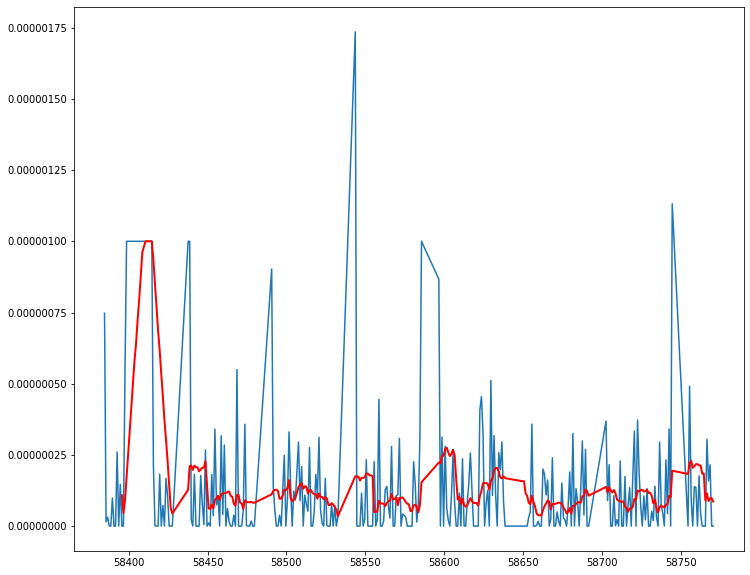

In [19]:
plt.plot(ts)
plt.plot(ts_SMA,"-",color="red",lw=2)
#plt.ylabel("Concentración de CO2 en Mauna Loa (ppm)")

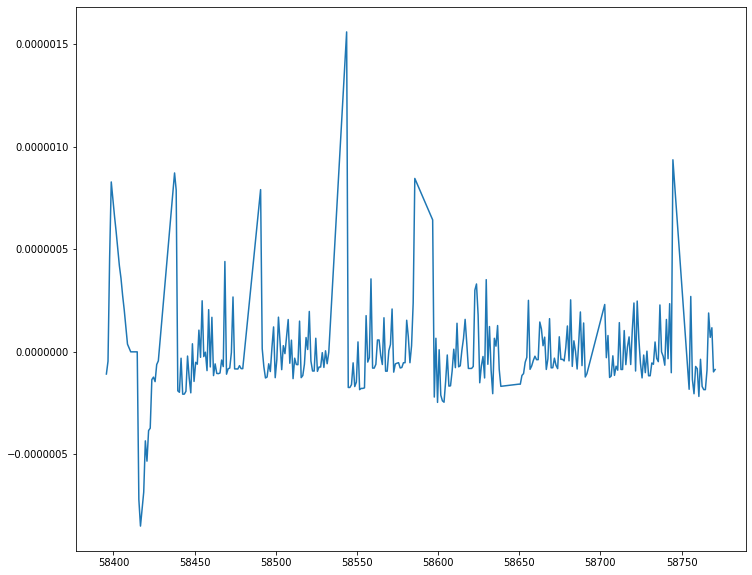

In [20]:
ts_dif = ts - ts_SMA
plt.plot(ts_dif)

#### Probando con diferentes longitudes de suavizado

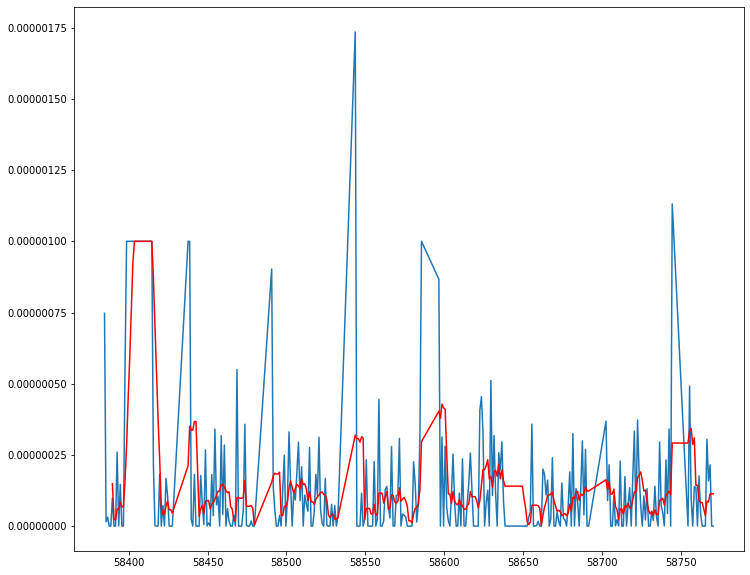

In [21]:
ts_SMA2 = ts.rolling(window=6).mean()
plt.plot(ts)
plt.plot(ts_SMA2,color="red")

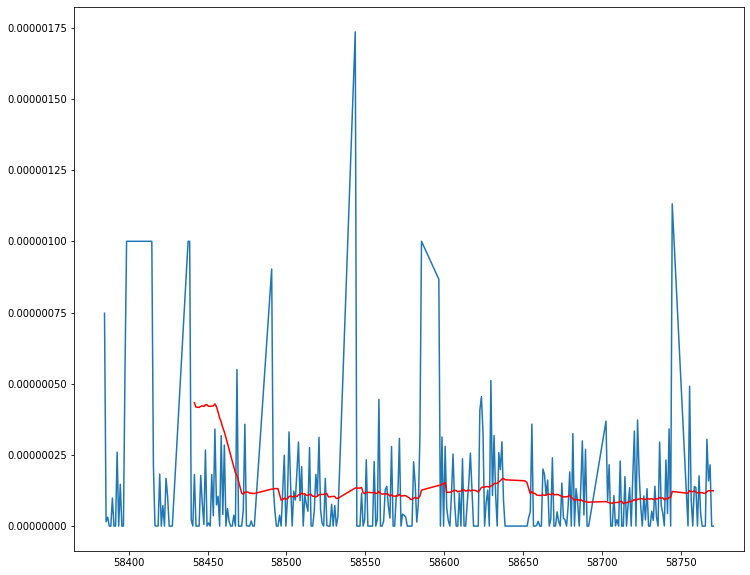

In [22]:
ts_SMA2 = ts.rolling(window=48).mean()
plt.plot(ts)
plt.plot(ts_SMA2,color="red")

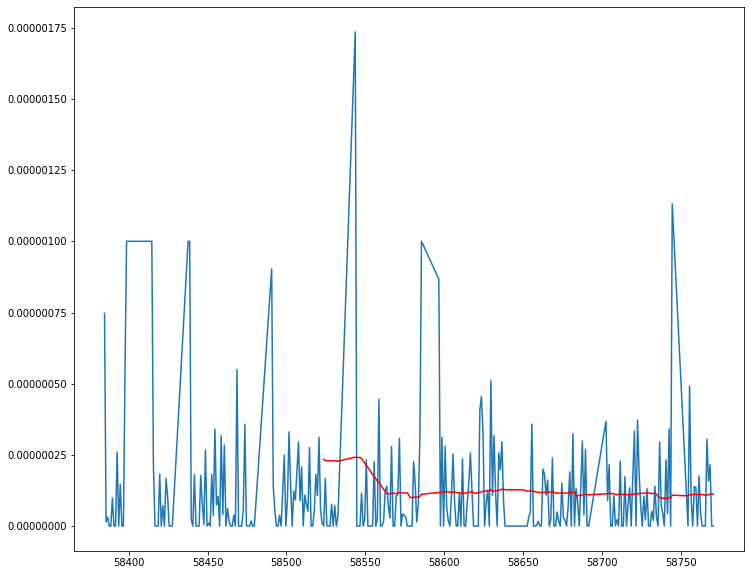

In [23]:
ts_SMA2 = ts.rolling(window=120).mean()
plt.plot(ts)
plt.plot(ts_SMA2,color="red")

#### Ajuste de la estacionalidad 

In [24]:
def estaciones(x, a, b, c, d):
    return a*np.cos(b*x + c) + d

In [26]:
ts_dif.dropna(inplace=True)
tiempo_dif = np.asarray(ts_dif.index)
flux_dif = np.asarray(ts_dif.data)

/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
popt, pcov = curve_fit(estaciones, tiempo_dif, flux_dif)
modelo_estaciones = estaciones(tiempo, *popt)   # sintaxis exótica: automáticamente "des-compacta" los argumentos

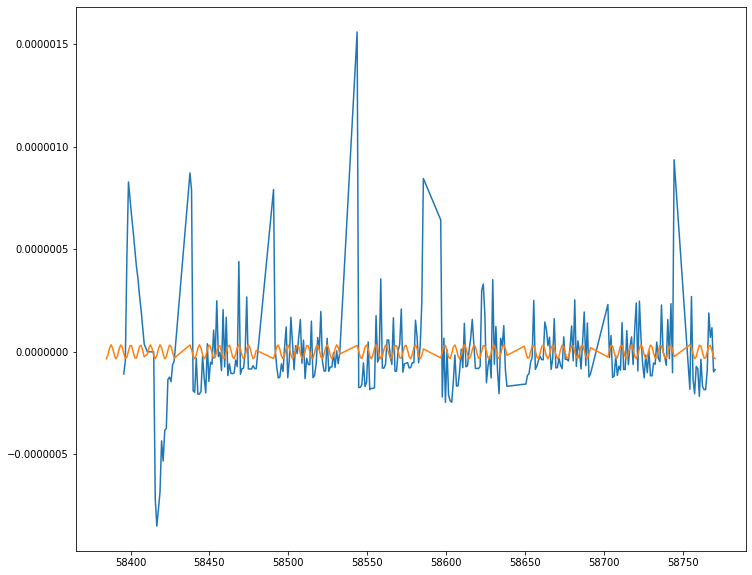

In [28]:
plt.plot(ts_dif)
plt.plot(tiempo, modelo_estaciones)

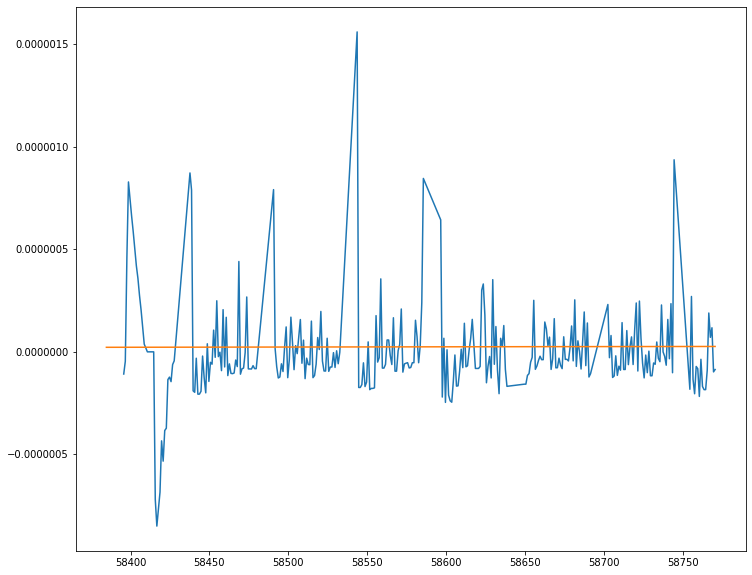

In [29]:
popt, pcov = curve_fit(estaciones, tiempo_dif, CO2_dif, p0=(3,2*np.pi,0,0))
modelo_estaciones = estaciones(tiempo, *popt)
plt.plot(ts_dif)
plt.plot(tiempo, modelo_estaciones)

#### Modelo con ambas componentes

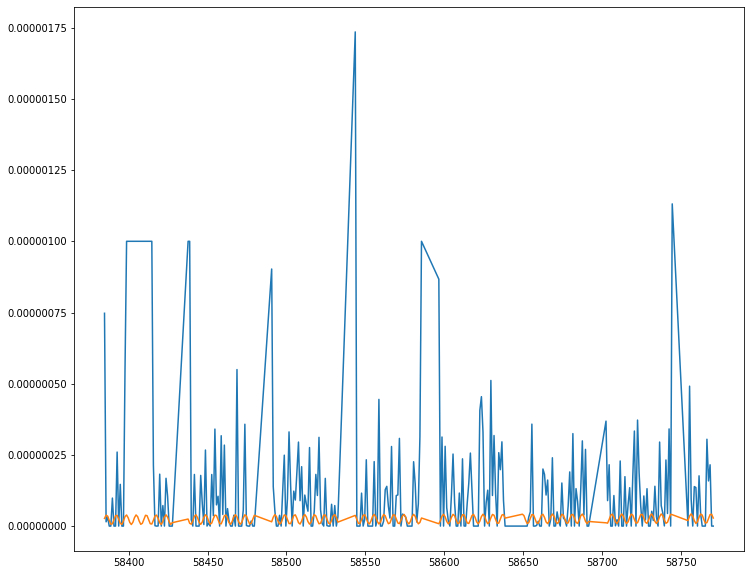

In [30]:
plt.plot(ts)
modelo = tendencia + modelo_estaciones
plt.plot(tiempo,modelo)

#### Promedio móvil exponencial

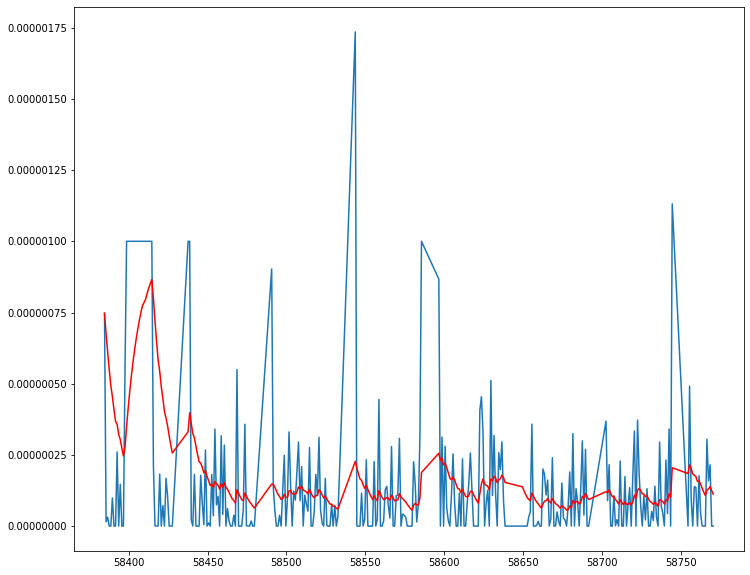

In [32]:
ts_EWM = ts.ewm(adjust=False,alpha=0.1).mean()
plt.plot(ts)
plt.plot(ts_EWM,color="red")

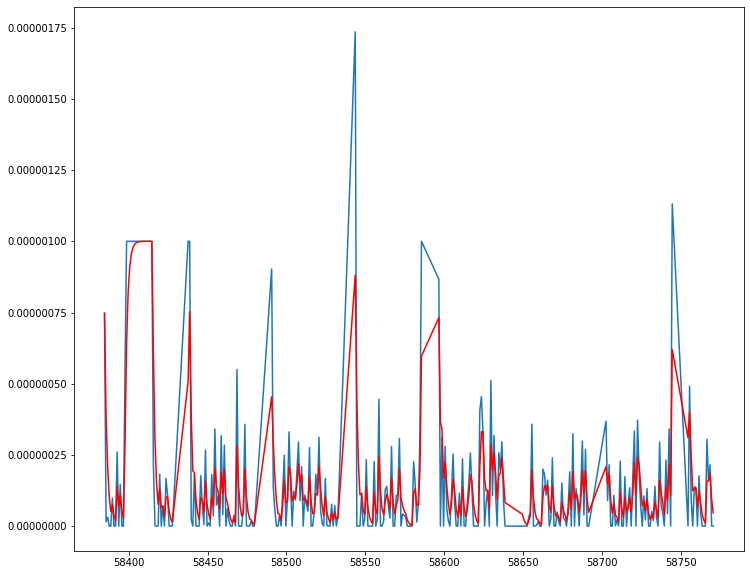

In [33]:
ts_EWM = ts.ewm(adjust=False,alpha=0.5).mean()
plt.plot(ts)
plt.plot(ts_EWM,color="red")